# 3주차 과제
- 학습률 최적화
- 군집 분석(병합 계층 군집) 구현 클론 코딩
- Cost function 구현

## 1. 학습률 최적화

간단한 예제를 통해 학습률 최적화의 중요성에 대해서 확인 해 보도록 하겠습니다.

아래 링크에서 __1단계만__에 손실 곡선의 최저점에 도달하게 하는 학습률을 찾아 정답을 적어주세요

링크: https://developers.google.com/machine-learning/crash-course/fitter/graph?hl=ko

### 정답 : 1.6

## 2. 군집 분석(병합 계층 군집) 구현 클론 코딩

군집 분석 강의(군집문제[2] 3:10 ~ 5:20 부분)를 보고 코드를 따라 치며 출력 결과(과제 설명 페이지 참고)를 만드세요. 

강의에서는 데이터 시각화까지 진행하지만 
과제에서는 표를 출력하는 것 까지만 하시면 됩니다.

3주차 과제 안내 페이지를 보시면 표에 대한 이미지가 있습니다. 참고해주세요

In [0]:
import numpy as np
np.random.seed(123)
X = np.random.random_sample([5, 3])*10

In [2]:
import pandas as pd
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
df = pd.DataFrame(X, columns = variables, index = labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [0]:
from scipy.spatial.distance import pdist, squareform

In [5]:
Y = pdist(df) # 5개의 데이터 사이의 Euclidean Distance
Y

array([4.973534  , 5.51665266, 5.89988504, 3.83539555, 4.34707339,
       5.10431109, 6.69823298, 7.24426159, 8.31659367, 4.382864  ])

In [10]:
# 거리 행렬
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns = labels, index = labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [0]:
from scipy.cluster.hierarchy import linkage

In [0]:
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')

In [14]:
pd.DataFrame(row_clusters, columns = ['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


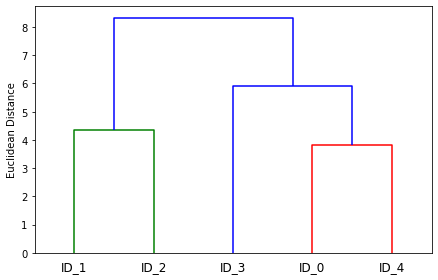

In [16]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_dendr = dendrogram(row_clusters, labels = labels)

plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.show();

## 3. Cost function 구현
## $$cost(W) =  \frac{1}{n}\sum_{i=1}^n (Wx^{(i)}-y^{(i)})^2$$

### 데이터(X, Y)

In [0]:
# 제공된 데이터는 변경 할 수 없습니다.
x = [1, 2, 3]
y = [2, 4, 6]

### cost function을 파이썬으로 구현하세요.
pass를 지우고 cost_func 함수를 완성하세요.

가중치(Weight)를 입력하면 코스트(cost)를 계산하는 함수를 만드는게 목적입니다.

In [0]:
# W(가중치) 데이터 타입 -> int or float
# x(학습 데이터) 데이터 타입 -> list
# y(정답 데이터) 데이터 타입 -> list
# cost_func 함수 리턴값 타입 -> float
# cost_func 함수 리턴값 = cost 값
# W:가중치, x:학습 데이터 y:정답 데이터

def cost_func(W, x, y):
  cost = sum([(W*a - b)**2 for a, b in zip(x, y)])
  return cost

예시) x가 [1, 2] 이고 y가 [3, 6] 그리고 W가 4 일 경우  cost_func(W, x, y)함수의 리턴값은 2.5

### cost_func을 활용하여 웨이트(Weight)가 -5부터 5까지의 변화에 따른 코스트(cost)를 출력 해주세요.

In [19]:
# 여기 코드셀은 변경하지 마세요.
# 완성된 함수를 확인하는 과정으로 해당 코드셀을 실행해서 정상 출력되면 정답!
# 주의! 에러가 날 경우 데이터 코드셀과 cost function 코드셀을 실행했는지 확인해주세요.
for feed_W in range(-5, 6, 1):
  curr_cost = cost_func(feed_W, x, y)
  print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-5.000 |  686.00000
-4.000 |  504.00000
-3.000 |  350.00000
-2.000 |  224.00000
-1.000 |  126.00000
 0.000 |   56.00000
 1.000 |   14.00000
 2.000 |    0.00000
 3.000 |   14.00000
 4.000 |   56.00000
 5.000 |  126.00000
